In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt

import os
from collections import deque

import numpy as np
import pandas as pd

In [2]:
def fetch_user_data(data_path):
    r"""Reads user data and refine it."""
    df_raw = pd.read_csv(data_path, header=None, names=["User", "Rating", "Date"], usecols=[0, 1, 2])

    tmp_movies = df_raw[df_raw["Rating"].isna()]["User"].reset_index()
    movie_indices = [[index, int(movie[:-1])] for index, movie in tmp_movies.values]

    shifted_movie_indices = deque(movie_indices)
    shifted_movie_indices.rotate(-1)

    user_data = []
    for [df_id_1, movie_id], [df_id_2, next_movie_id] in zip(movie_indices, shifted_movie_indices):
        if df_id_1<df_id_2:
            tmp_df = df_raw.loc[df_id_1+1:df_id_2-1].copy()
        else:
            tmp_df = df_raw.loc[df_id_1+1:].copy()
            
        tmp_df["Movie"] = movie_id
        user_data.append(tmp_df)

    df = pd.concat(user_data)
    print(f"Shape of raw User-Ratings: {df.shape}")

    return df

In [3]:
def fetch_movie_titles(data_path):
    r"""Reads movie titles and returns dataframe."""
    movie_titles = pd.read_csv(data_path, 
                               encoding="ISO-8859-1", 
                               header=None, 
                               names=["Id", "Year", "Name"]).set_index("Id")

    print(f"Shape of Movie-Titles: {movie_titles.shape}")

    return movie_titles

In [4]:
data_dir = "./data"
data_path = os.path.join(data_dir, "combined_data_1.txt")

movie_titles = fetch_movie_titles(os.path.join(data_dir, "movie_titles.csv"))

df_raw = fetch_user_data(data_path)

Shape of Movie-Titles: (17770, 2)
Shape of raw User-Ratings: (24053764, 4)


In [5]:
def rating_movie_distribution(df):
    data = df.groupby("Movie")["Rating"].count().clip(upper=10000).values

    plt.grid(True)
    plt.xlabel("Ratings")
    plt.ylabel("Count")
    plt.title("Histogram of movie ratings")
    n, bins, patches = plt.hist(data, 50, facecolor="green", alpha=0.75)

In [6]:
# rating_movie_distribution(df_raw)

In [7]:
def rating_user_distribution(df):
    data = df.groupby("User")["Rating"].count().clip(upper=200)

    plt.grid(True)
    plt.xlabel("Ratings")
    plt.ylabel("Count")
    plt.title("Histogram of user ratings")
    n, bins, patches = plt.hist(data, 50, facecolor="red", alpha=0.75)

<IPython.core.display.Javascript object>


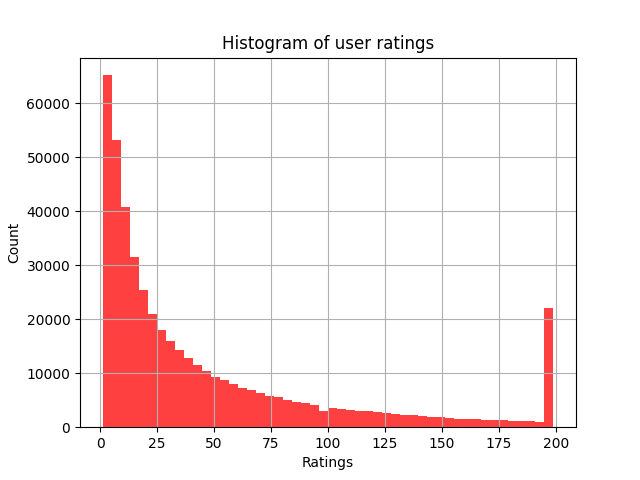

In [8]:
rating_user_distribution(df_raw)